In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [3]:
yf.pdr_override() 
f = pdr.get_data_yahoo("NFLX",start="2010-01-01", end="2019-12-09")
print(f)
f.reset_index(level=0, inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    7.931428    7.961429    7.565714    7.640000    7.640000   
2010-01-05    7.652857    7.657143    7.258572    7.358572    7.358572   
2010-01-06    7.361429    7.672857    7.197143    7.617143    7.617143   
2010-01-07    7.731429    7.757143    7.462857    7.485714    7.485714   
2010-01-08    7.498571    7.742857    7.465714    7.614286    7.614286   
...                ...         ...         ...         ...         ...   
2019-12-02  314.390015  314.390015  303.750000  309.989990  309.989990   
2019-12-03  302.220001  307.359985  301.880005  306.160004  306.160004   
2019-12-04  308.429993  308.429993  303.269989  304.320007  304.320007   
2019-12-05  305.269989  306.480011  298.809998  302.859985  302.859985   
2019-12-06  304.700012  307.850006  302.600

In [4]:
df= f[['Date','Adj Close']]

In [5]:
df.columns=['ds','y']

In [6]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [7]:
future = m.make_future_dataframe(periods=365)

In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2860,2020-12-01,378.665951,333.699446,424.454387
2861,2020-12-02,378.490618,336.992394,419.710715
2862,2020-12-03,378.742216,332.651579,421.122910
2863,2020-12-04,378.437569,332.603639,423.186345
2864,2020-12-05,379.336252,335.301534,428.364883


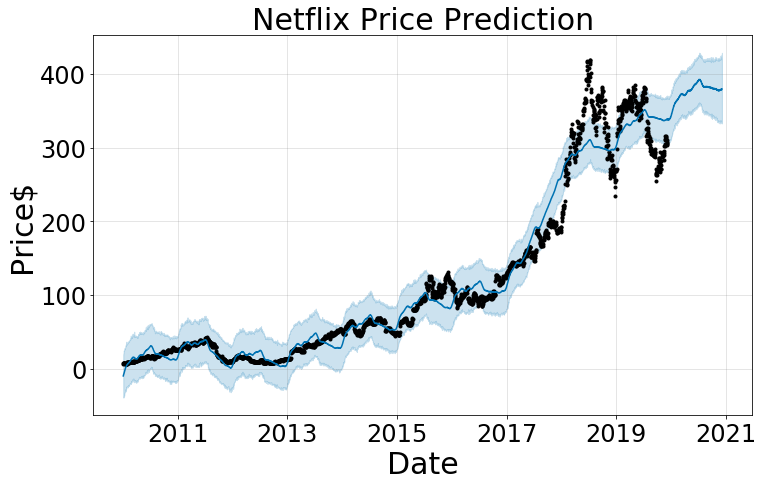

In [9]:
fig = m.plot(forecast, xlabel='Date', ylabel='Price$')
ax = fig.gca()
ax.set_title("Netflix Price Prediction", size=30)
ax.set_xlabel("Date", size=30)
ax.set_ylabel("Price$", size=30)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)